# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from config import folder_path

appearances_df = pd.read_csv(f"{folder_path}/appearances.csv")

# Data Preparation of Appearances

In [2]:
appearances_df.shape

(1507351, 13)

In [3]:
appearances_df.head(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
5,2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
6,2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
7,2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
8,2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45
9,2235545_30003,2235545,30003,317,317,2012-07-05,Wout Brama,ELQ,0,0,0,0,90


In [4]:
appearances_df = appearances_df.set_index('appearance_id')
appearances_df.head(10)

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45


In [5]:
appearances_df.loc[appearances_df.duplicated()]

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,


In [6]:
appearances_df.isna().sum()

game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

In [7]:
appearances_df.loc[appearances_df['player_name'].isna()]

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2464775_14280,2464775,14280,3327,-1,2014-08-17,NaN,PO1,1,0,0,0,90
2464775_192599,2464775,192599,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,45
2464775_194603,2464775,194603,3327,-1,2014-08-17,NaN,PO1,1,0,0,0,90
2464775_33235,2464775,33235,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,58
2464775_35246,2464775,35246,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
2810017_255495,2810017,255495,11596,-1,2017-01-04,NaN,CDR,0,0,0,0,90
2810025_255495,2810025,255495,11596,-1,2017-01-11,NaN,CDR,0,0,0,0,90
2814841_255495,2814841,255495,11596,-1,2017-01-18,NaN,CDR,0,0,0,0,90


In [8]:
appearances_df.loc[appearances_df['player_current_club_id']==-1]

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2464775_14280,2464775,14280,3327,-1,2014-08-17,NaN,PO1,1,0,0,0,90
2464775_192599,2464775,192599,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,45
2464775_194603,2464775,194603,3327,-1,2014-08-17,NaN,PO1,1,0,0,0,90
2464775_33235,2464775,33235,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,58
2464775_35246,2464775,35246,3327,-1,2014-08-17,NaN,PO1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
2810017_255495,2810017,255495,11596,-1,2017-01-04,NaN,CDR,0,0,0,0,90
2810025_255495,2810025,255495,11596,-1,2017-01-11,NaN,CDR,0,0,0,0,90
2814841_255495,2814841,255495,11596,-1,2017-01-18,NaN,CDR,0,0,0,0,90


In [9]:
appearances_df.dropna(subset=['player_name'])

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...
4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10


In [10]:
appearances_df.dtypes

game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [11]:
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df.dtypes

game_id                            int64
player_id                          int64
player_club_id                     int64
player_current_club_id             int64
date                      datetime64[ns]
player_name                       object
competition_id                    object
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

# Data Analysis of Appearances

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
appearances_df['minutes_played'].describe()

count   1507351.00
mean         69.65
std          29.76
min           1.00
25%          52.00
50%          90.00
75%          90.00
max         120.00
Name: minutes_played, dtype: float64

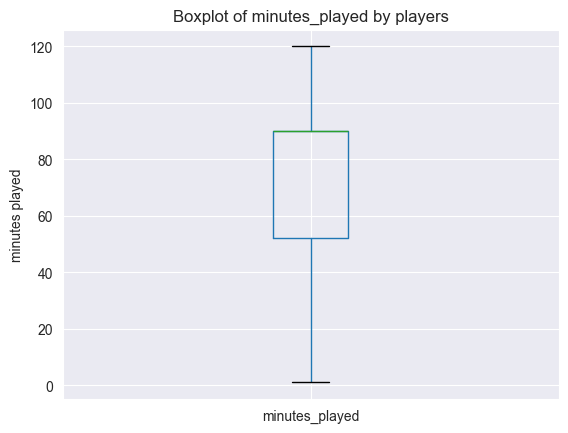

In [13]:
# check for minutes_played outliers
ax = appearances_df.boxplot(column='minutes_played')
ax.set_title('Boxplot of minutes_played by players')
plt.xlabel('')
plt.ylabel('minutes played')
plt.show()

Media di minutes_played: 69.65


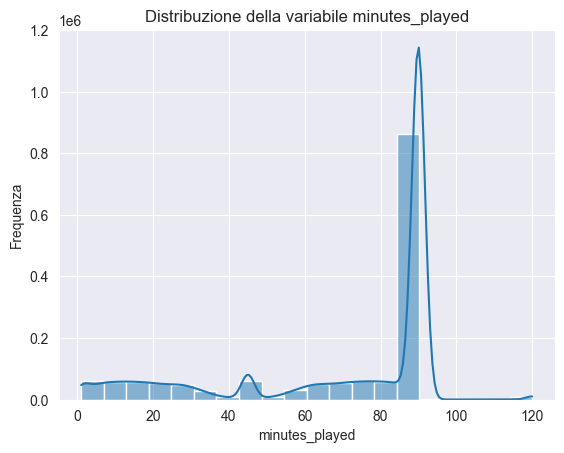

In [14]:
df = appearances_df
var = 'minutes_played'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=20)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

In [15]:
appearances_df['date'].describe()

count                          1507351
mean     2018-03-31 15:32:46.023572224
min                2012-07-03 00:00:00
25%                2015-04-19 00:00:00
50%                2018-02-24 00:00:00
75%                2021-02-27 00:00:00
max                2023-11-30 00:00:00
Name: date, dtype: object

In [16]:
appearances_df.columns

Index(['game_id', 'player_id', 'player_club_id', 'player_current_club_id',
       'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played'],
      dtype='object')

In [17]:
appearances_df['competition_id'].value_counts()

competition_id
IT1     124015
ES1     122229
GB1     119599
FR1     118873
TR1     105004
L1       99430
NL1      95190
PO1      93428
BE1      82541
RU1      77672
GR1      73586
SC1      65545
UKR1     57653
DK1      56437
EL       44942
CL       37415
ELQ      15840
CDR      12677
GRP      12587
FAC      10660
RUP       9598
DFB       9339
POCP      9165
CIT       9129
NLP       8342
CLQ       7834
DKP       7580
SFA       5753
UKRP      5358
ECLQ      4215
CGB       1431
SUC        719
GBCS       353
DFL        348
USC        346
RUSS       343
POSU       329
KLUB       328
SCI        316
FRCH       313
NLSC       309
BESC       305
UKRS       275
Name: count, dtype: int64

# Saving processed data to feather file

In [18]:
appearances_df.to_feather('../cleaned_data/appearances.feather')